# MINE 432 Final Project - Quality Prediction of Iron Ore

## Summary / Introduction

This is a summary of our project.

### Importing Basic Libraries

In [85]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

import seaborn as sb
import seaborn as sns
from seaborn import heatmap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Importing the Dataset

In [86]:
dataset = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv', decimal=',')

### A Quick Review of the Data

Show the dataframe

In [87]:
dataset

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


In [88]:
dataset.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [89]:
# get the types of each column
dataset.dtypes

date                             object
% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
dtype: object

Check for missing data

In [90]:
#check for missing values
dataset.isnull().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

## Exploratory Data Analysis (EDA)

The date has no impact on the % of silica, so we can drop it.

In [91]:
dataset.drop(['date'], axis=1, inplace=True)

In [92]:
dataset.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


### Check for Outliers

Visualize the data to see if there are any outliers

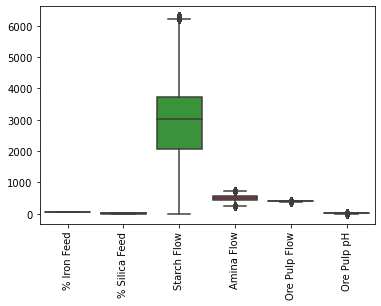

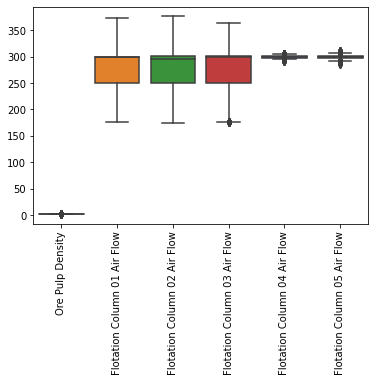

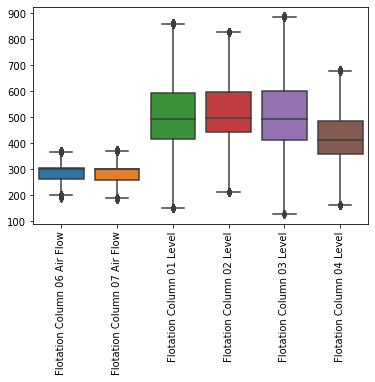

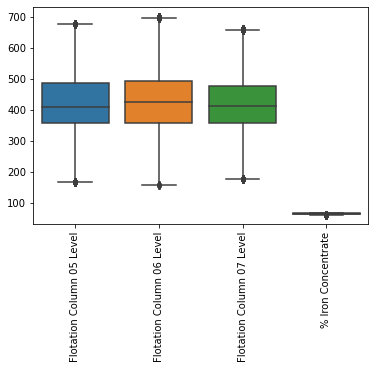

In [93]:

# create boxplots of each column except % silica concentrate
x = dataset.iloc[:, :-1]
for i in range(0, len(x.columns), 6):
    sns.boxplot(data=x.iloc[:, i:i+6])
    # make the x 
    plt.xticks(rotation=90)
    plt.show()


Based on the boxplots above, we want to remove outliers from the data.

### Check for Correlation

Here we check for strong correlation between the % of silica column and the other columns.

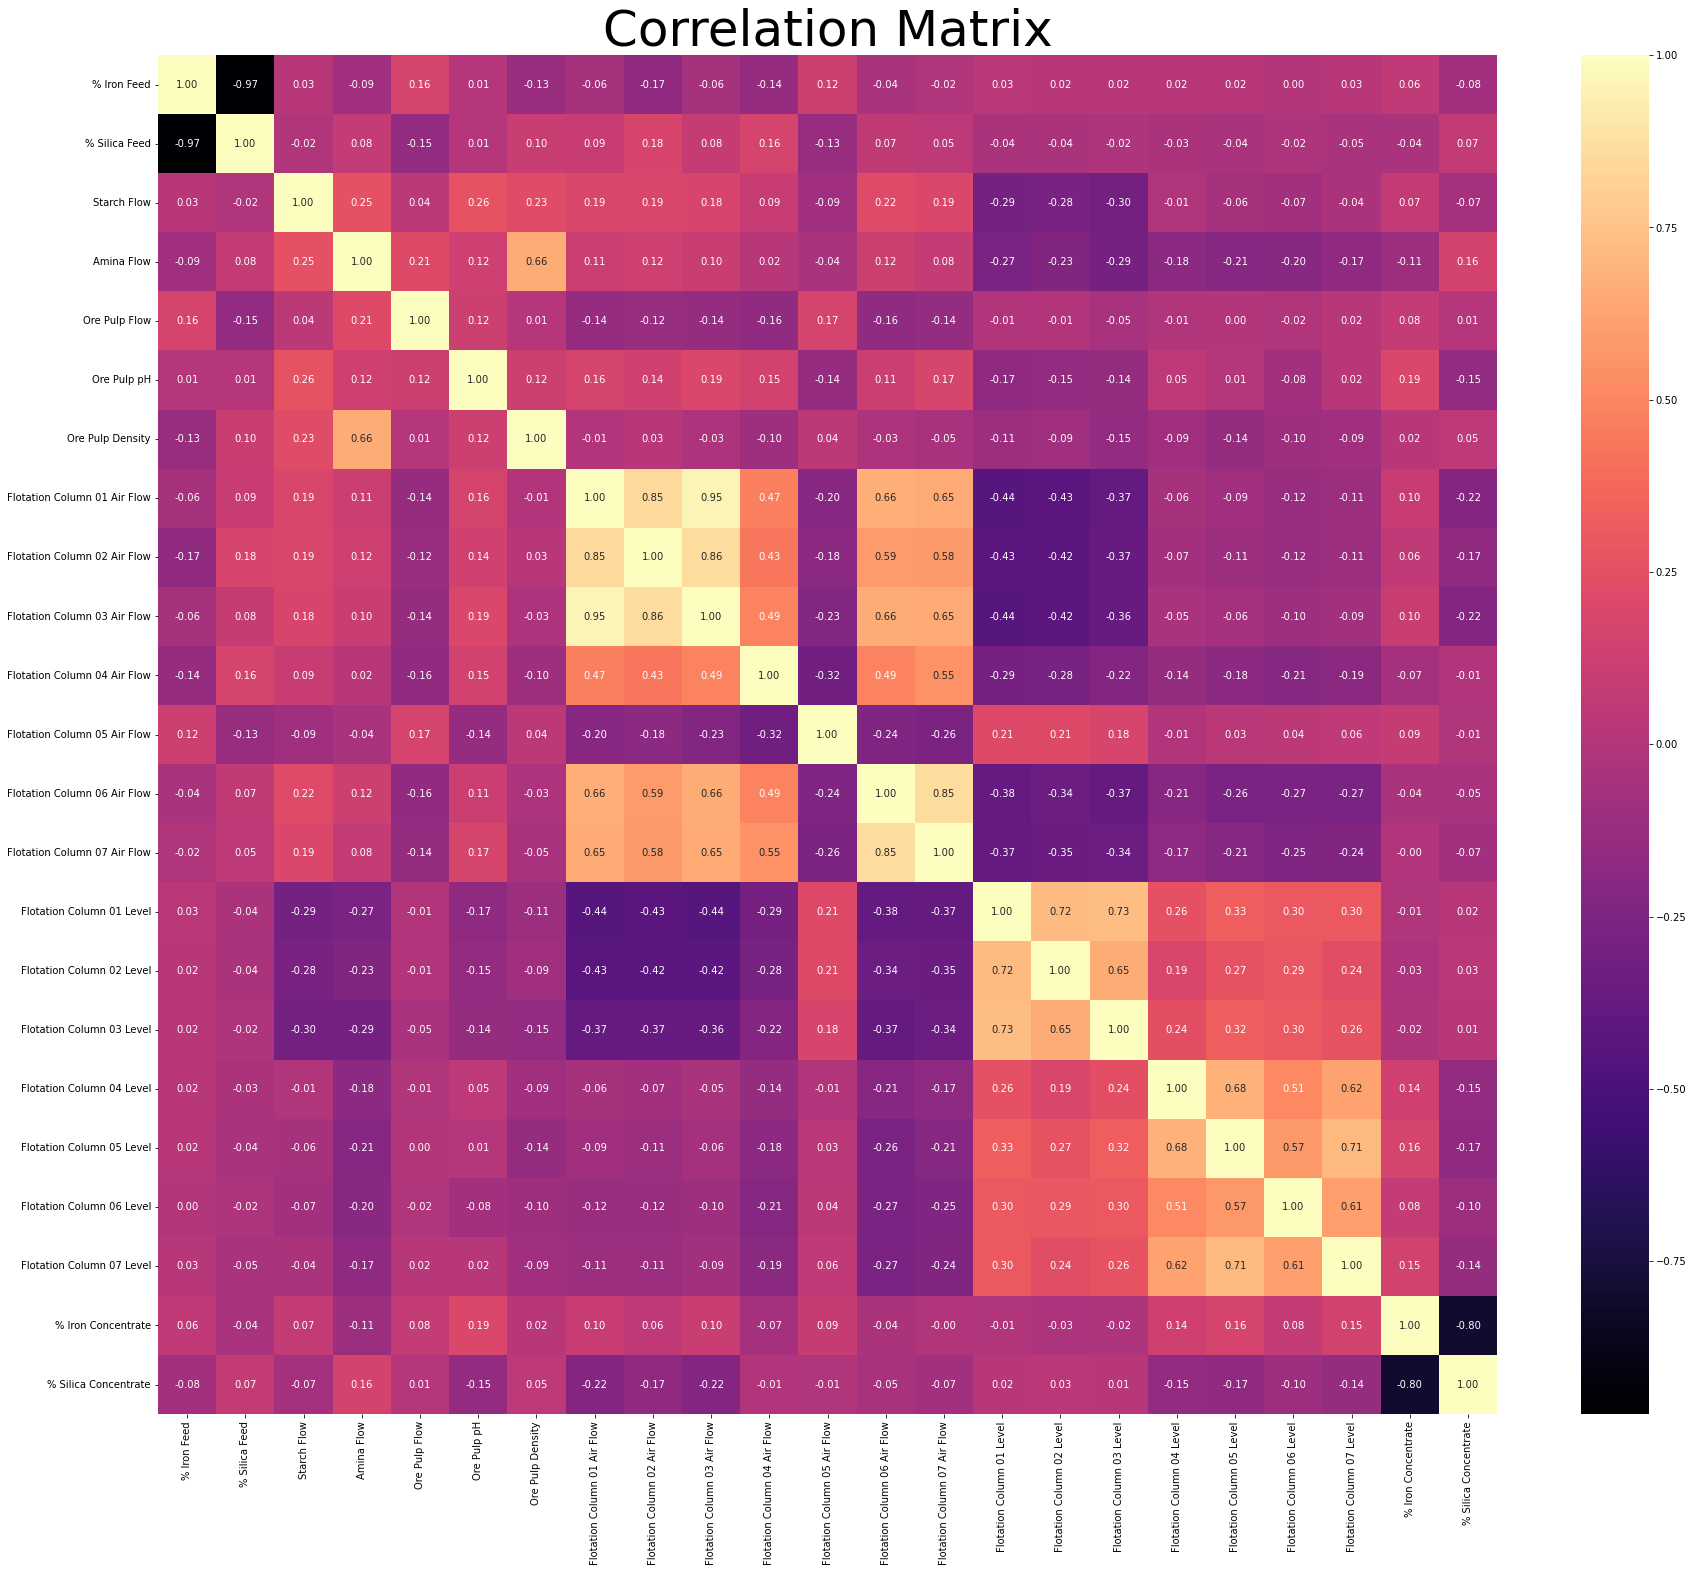

In [94]:
# creating the correlation matrix
def plotCorrelationMatrix(dataset):
    corr_matrix = dataset.corr()
    # visualizing the correlation matrix
    plt.figure(figsize=(30, 25))  # to set the figure size
    heatmap(corr_matrix, annot=True, lw=0, linecolor='white', cmap='magma', fmt='0.2f')
    plt.title("Correlation Matrix")  # to add title 
    # incrase title size
    plt.title("Correlation Matrix", fontsize=50)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

plotCorrelationMatrix(dataset)
## End

## Data Preprocessing

### Remove Outliers

Remove the outliers we found earlier. We will use the IQR method. 

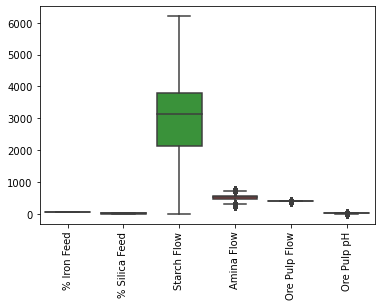

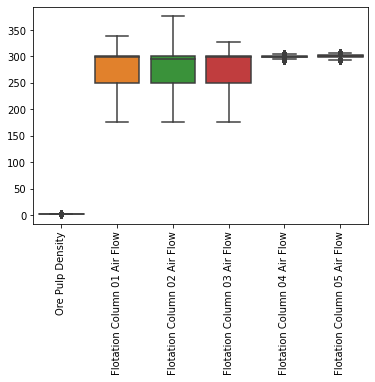

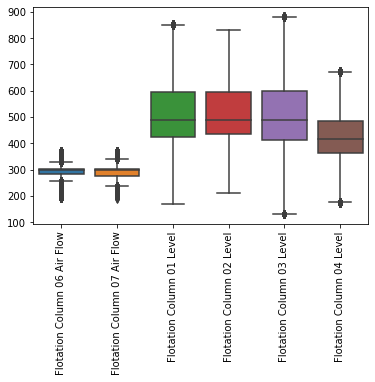

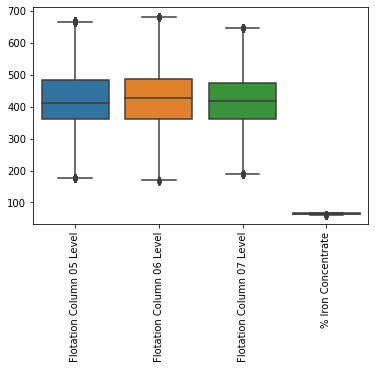

In [95]:
# remove outliers from all columns
x = dataset.iloc[:, :-1]
for i in range(0, len(x.columns)):
    q1 = dataset.iloc[:, i].quantile(0.25)
    q3 = dataset.iloc[:, i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    dataset = dataset[(dataset.iloc[:, i] > lower_bound) & (dataset.iloc[:, i] < upper_bound)]

# # create boxplots of each column except % silica concentrate
x = dataset.iloc[:, :-1]
for i in range(0, len(x.columns), 6):
    sns.boxplot(data=x.iloc[:, i:i+6])
    # make the x
    plt.xticks(rotation=90)
    plt.show()


### Remove Correlated Columns

Define a function to find correlated columns, given a threshold.

In [96]:
def correlation(df, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

Call the function to find correlated columns.

In [97]:
x = dataset.iloc[:, :-1]
corr_features = correlation(x, 0.7)
corr_features

{'% Silica Feed',
 'Flotation Column 02 Air Flow',
 'Flotation Column 02 Level',
 'Flotation Column 03 Air Flow',
 'Flotation Column 03 Level',
 'Flotation Column 05 Level',
 'Flotation Column 06 Air Flow',
 'Flotation Column 07 Air Flow',
 'Flotation Column 07 Level'}

Remove the correlated columns from the dataframe to avoid multicollinearity.

In [98]:
dataset = dataset.drop(corr_features, axis=1)

Re plot the correlation matrix.

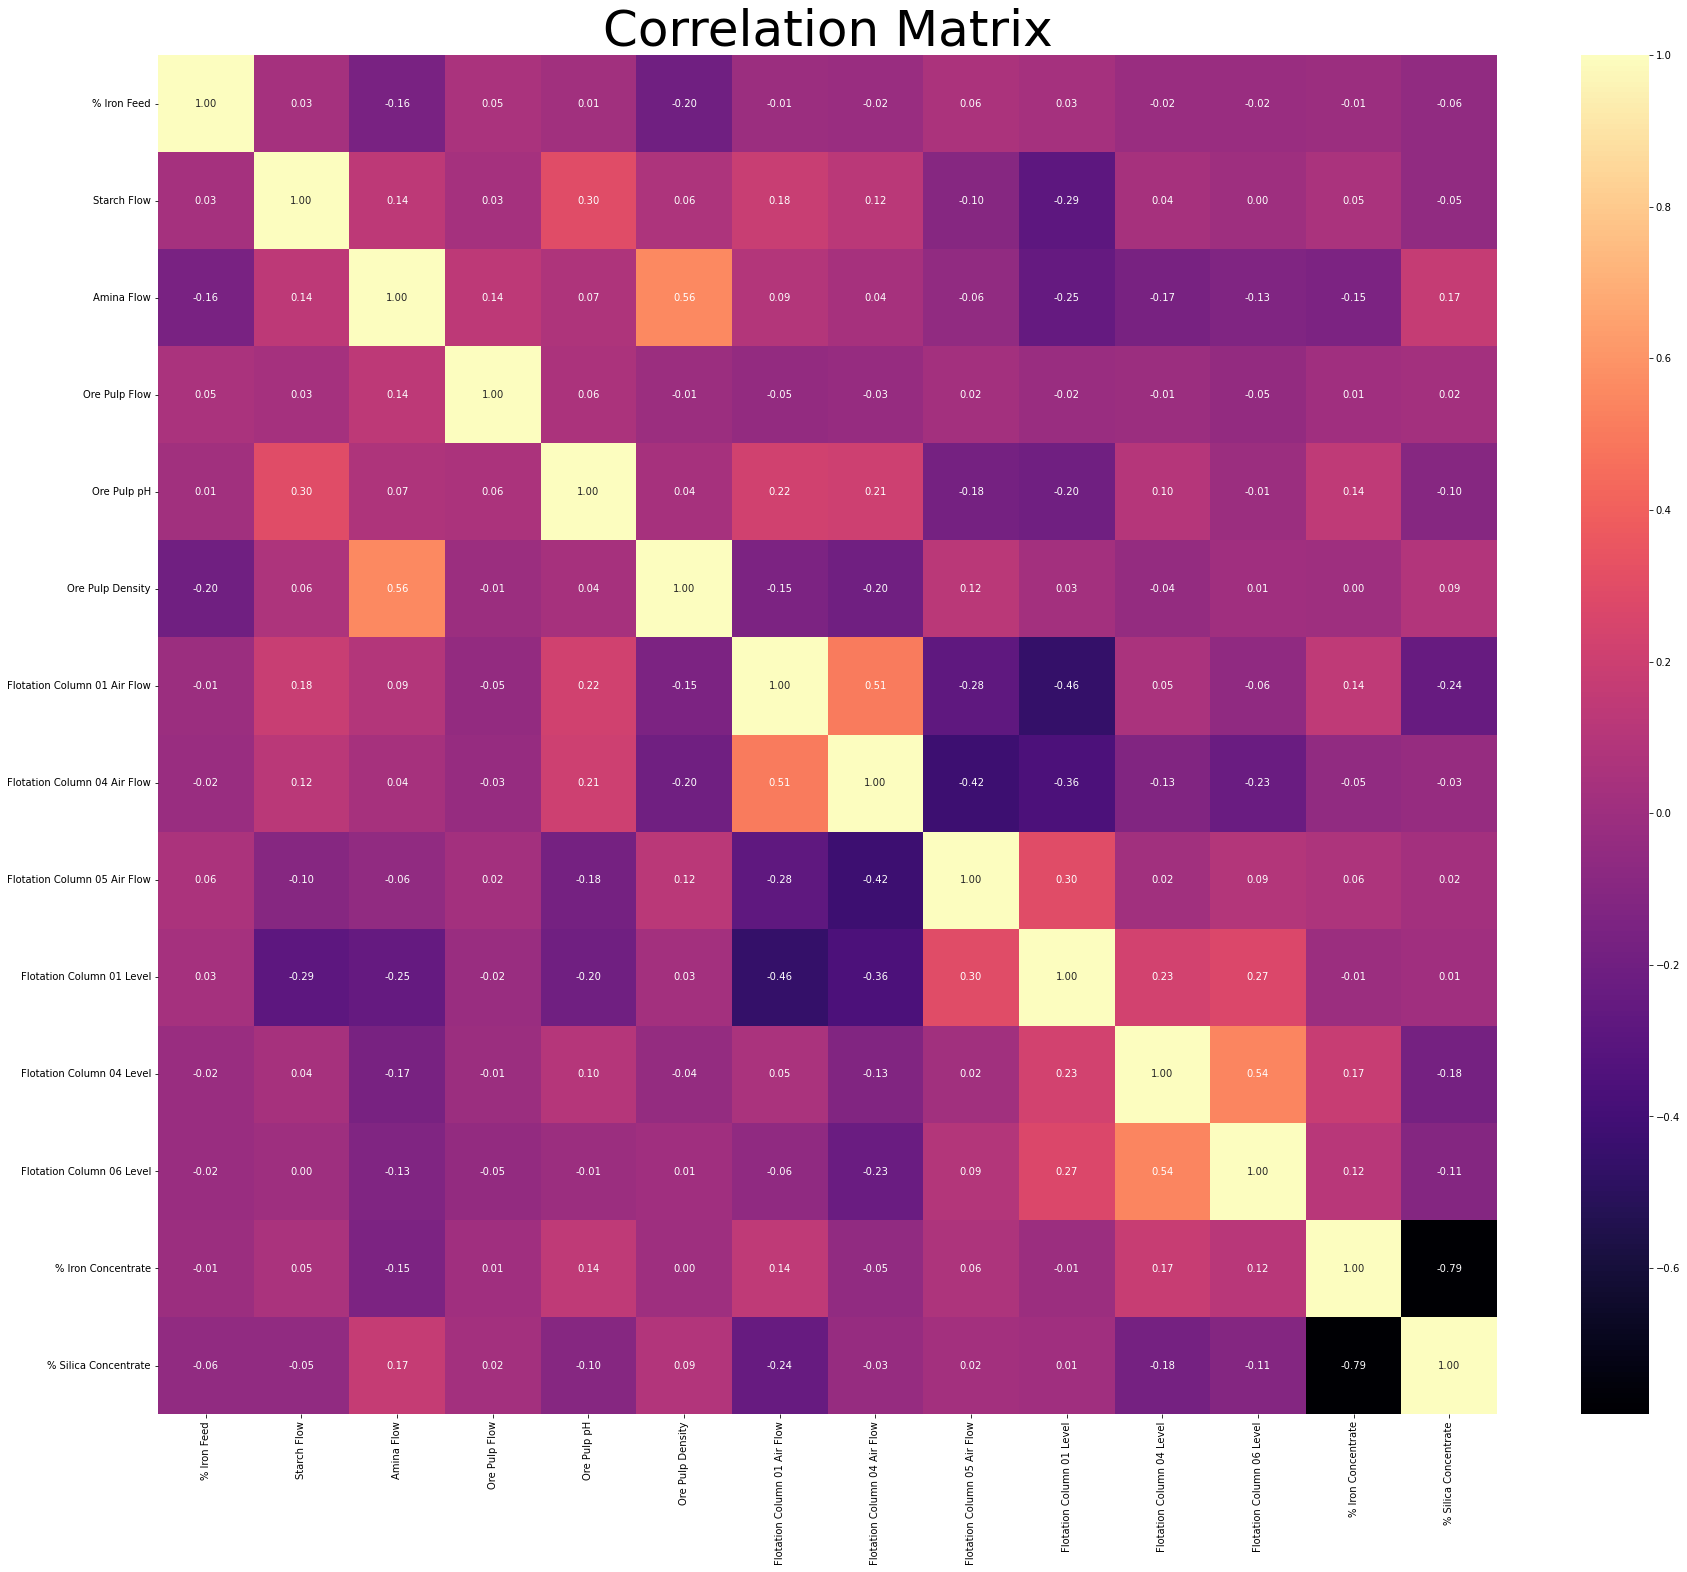

In [99]:
plotCorrelationMatrix(dataset)

In [100]:
dataset.head()

,% Iron Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 01 Level,Flotation Column 04 Level,Flotation Column 06 Level,% Iron Concentrate,% Silica Concentrate
0,55.2,3019.53,557.434,395.713,10.0664,1.74,249.214,295.096,306.4,457.396,443.558,446.370,66.91,1.31
1,55.2,3024.41,563.965,397.383,10.0672,1.74,249.719,295.096,306.4,451.891,448.086,445.922,66.91,1.31
2,55.2,3043.46,568.054,399.668,10.0680,1.74,249.741,295.096,306.4,451.240,449.688,447.826,66.91,1.31
3,55.2,3047.36,568.665,397.939,10.0689,1.74,249.917,295.096,306.4,452.441,446.210,437.690,66.91,1.31
4,55.2,3033.69,558.167,400.254,10.0697,1.74,250.203,295.096,306.4,452.441,453.670,443.682,66.91,1.31


In [101]:
dataset

,% Iron Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 01 Level,Flotation Column 04 Level,Flotation Column 06 Level,% Iron Concentrate,% Silica Concentrate
0,55.20,3019.53,557.434,395.713,10.06640,1.74000,249.214,295.096,306.400,457.396,443.558,446.370,66.91,1.31
1,55.20,3024.41,563.965,397.383,10.06720,1.74000,249.719,295.096,306.400,451.891,448.086,445.922,66.91,1.31
2,55.20,3043.46,568.054,399.668,10.06800,1.74000,249.741,295.096,306.400,451.240,449.688,447.826,66.91,1.31
3,55.20,3047.36,568.665,397.939,10.06890,1.74000,249.917,295.096,306.400,452.441,446.210,437.690,66.91,1.31
4,55.20,3033.69,558.167,400.254,10.06970,1.74000,250.203,295.096,306.400,452.441,453.670,443.682,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,49.75,2710.94,441.052,386.570,9.62129,1.65365,302.344,299.920,299.623,392.160,418.725,446.357,64.27,1.71
737449,49.75,2692.01,473.436,384.939,9.62063,1.65352,303.013,299.710,300.465,401.505,418.377,372.995,64.27,1.71
737450,49.75,2692.20,500.488,383.496,9.61874,1.65338,303.662,299.927,299.707,408.899,419.531,336.035,64.27,1.71
737451,49.75,1164.12,491.548,384.976,9.61686,1.65324,302.550,299.372,298.819,405.107,407.299,340.844,64.27,1.71


Split the dataset into input and output

In [102]:
# split into X and y
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

### Feature Scaling

In [103]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Splitting the datset into the Training set and Test set

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [105]:
print(y_train.shape)
print(X_train.shape)

(419840,)
(419840, 13)


### A Quick Check of the Output Data

In [106]:
y_train = y_train.ravel()
y_train

array([2.62      , 4.63249369, 5.17      , ..., 4.03      , 2.55      ,
       1.8       ])

In [107]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Linear Regression Model

### Training the Model

In [108]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predicting the Test set results

In [109]:
y_pred = regressor.predict(X_test)

Make a random prediction

In [110]:
y_test = y_test.ravel()
y_test

array([1.23      , 1.15      , 3.61416857, ..., 2.63      , 1.22      ,
       4.29      ])

In [111]:
print("The Prediction % Silica =",y_pred[6])
print("The Actual % Silica =",y_test[6])

The Prediction % Silica = 2.03064469386454
The Actual % Silica = 2.25


This is a close prediction to the actual value for the % of silica.

### Evaluating the Model Performance

In [112]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2score = r2_score(y_test, y_pred)
print("The R2 Score =", r2score * 100, "%")

rmse = np.sqrt(mean_absolute_error(y_test, y_pred))
print("The Root Mean Squared Error =", rmse * 100 ,"%")

The R2 Score = 66.23282459155658 %
The Root Mean Squared Error = 69.85972843443386 %


Measure the accuracy of the model

In [113]:
y_test = y_test.ravel()
print(type(y_test))
print(y_test.shape)
y_test

<class 'numpy.ndarray'>
(104961,)


array([1.23      , 1.15      , 3.61416857, ..., 2.63      , 1.22      ,
       4.29      ])

In [114]:
print(type(y_pred))
print(y_pred.shape)
y_pred

<class 'numpy.ndarray'>
(104961,)


array([1.35372066, 0.84688015, 4.00257453, ..., 2.74002888, 1.29247603,
       2.35695424])

Measuring the average accuracy of the model

In [115]:
avg_accuracy = 0
for i in range(len(y_pred)):
    error = abs(y_pred[i] - y_test[i])
    avg_accuracy += 1 - error / y_test[i]


avg_accuracy = avg_accuracy / len(y_pred)
print("The Accuracy of the Model =", round(avg_accuracy, 6) * 100, "%")        

The Accuracy of the Model = 75.77390000000001 %


### Using the Model to Predict the % of Silica

In [116]:
x_predict_test = X_test[45]
y_pred_new = regressor.predict(x_predict_test.reshape(1, -1))
print("The Predicted % Silica =", y_pred_new[0], "%")


The Predicted % Silica = 1.8428674294114518 %


reference

https://www.kaggle.com/code/aditya100/quality-prediction-in-iron-ore


## Lasso Regressor Model

### Step 1. Training the Model

In [117]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)


Lasso()

### Step 2. Predicting the Test set results

In [118]:
predictions = lasso.predict(X_test)

Make a random prediction

In [119]:
print("The Prediction % Silica =",predictions[7], "%")
print("The Actual % Silica =",y_test[7], "%")

The Prediction % Silica = 2.2680903320288177 %
The Actual % Silica = 3.11 %


### Step 3. Evaluating the Model Performance

In [120]:
r2score = r2_score(y_test, predictions)
print("The R2 Score =", r2score)

error = mean_squared_error(y_test, predictions)
print("The Mean Squared Error =", error)

The R2 Score = -4.3003369389893464e-06
The Mean Squared Error = 1.1813480961656109


## Stochastic Gradient Descent Regressor Model

In [121]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

SGDRegressor()

In [122]:
prediction = sgd.predict(X_test)

In [123]:
print("The Prediction % Silica =",predictions[7], "%")
print("The Actual % Silica =",y_test[7], "%")

The Prediction % Silica = 2.2680903320288177 %
The Actual % Silica = 3.11 %


In [124]:
r2score = r2_score(y_test, predictions)
print("The R2 Score =", r2score)

error = mean_squared_error(y_test, predictions)
print("The Mean Squared Error =", error)

The R2 Score = -4.3003369389893464e-06
The Mean Squared Error = 1.1813480961656109
